In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [3]:
# pandas读入
data = pd.read_csv('10.Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print x
print y

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
model = Lasso()
# model = Ridge()
print model
alpha_can = np.logspace(-3, 2, 10)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print '超参数：\n', lasso_model.best_params_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
超参数：
{'alpha': 0.59948425031894093}


In [7]:
print alpha_can
np.set_printoptions(suppress=True)
print alpha_can

[  1.00000000e-03   3.59381366e-03   1.29154967e-02   4.64158883e-02
   1.66810054e-01   5.99484250e-01   2.15443469e+00   7.74263683e+00
   2.78255940e+01   1.00000000e+02]
[   0.001         0.00359381    0.0129155     0.04641589    0.16681005
    0.59948425    2.15443469    7.74263683   27.82559402  100.        ]


0.914773478474
1.99287186631 1.41169113701


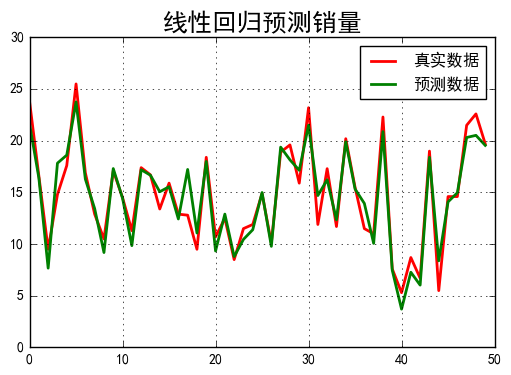

In [11]:
y_hat = lasso_model.predict(x_test)
print lasso_model.score(x_test, y_test)
mse = np.mean((y_hat - y_test) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print mse, rmse

t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [10]:
path = '10.iris.data'  # 数据文件路径

# # 手写读取数据
f = file(path)
x = []
y = []
for d in f:
    d = d.strip()
    if d:
        d = d.split(',')
        y.append(d[-1])
        x.append(map(float, d[:-1]))
print '原始数据X：\n', x[:5]
print '原始数据Y：\n', y[:5]
x = np.array(x)
print 'Numpy格式X：\n', x[:5]
y = np.array(y)
print 'Numpy格式Y - 1:\n', y[:5]

原始数据X：
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2]]
原始数据Y：
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']
Numpy格式X：
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Numpy格式Y - 1:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [11]:
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2
print 'Numpy格式Y - 2:\n', y

Numpy格式Y - 2:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2']


In [33]:
tt=['a','a','a','a','a']
print tt=='a'
tt=np.array(tt)
print tt=='a'
tt[tt=='a']=0
print tt
print tt.astype(dtype=np.int32)

False
[ True  True  True  True  True]
['0' '0' '0' '0' '0']
[0 0 0 0 0]


In [34]:
y = y.astype(dtype=np.int)
print 'Numpy格式Y - 3:\n', y
print '\n\n============================================\n\n'

Numpy格式Y - 3:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]






In [36]:
#使用sklearn的数据预处理
df = pd.read_csv(path, header=None)
x = df.values[:, :-1]
y = df.values[:, -1]
print x.shape,type(x)
print y.shape,type(y)
print 'x = \n', x
print 'y = \n', y

(150L, 4L) <type 'numpy.ndarray'>
(150L,) <type 'numpy.ndarray'>
x = 
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]

In [38]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print le.classes_
y = le.transform(y)
print 'Last Version, y = \n', y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Last Version, y = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
data = pd.read_csv('10.iris.data', header=None)
iris_types = data[4].unique()
print iris_types

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [46]:
for i, type in enumerate(iris_types):
    data.set_value(data[4] == type, 4, i)
x, y = np.split(data.values, [4], axis=1)
x = x.astype(np.float)
y = y.astype(np.int)
print 'x = \n', x[:5],x.shape
print 'y = \n', y[:5],y.shape
# 仅使用前两列特征

x = 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]] (150L, 4L)
y = 
[[0]
 [0]
 [0]
 [0]
 [0]] (150L, 1L)


In [49]:
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('clf', LogisticRegression()) ])
lr.fit(x, y)
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print 'y_hat = \n', y_hat[:5]
print 'y_hat_prob = \n', y_hat_prob[:5]
print u'准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel()))

y_hat = 
[0 0 0 0 0]
y_hat_prob = 
[[ 0.87657528  0.08222018  0.04120455]
 [ 0.70878524  0.25734725  0.0338675 ]
 [ 0.8222077   0.15871946  0.01907284]
 [ 0.79219681  0.1921252   0.01567799]
 [ 0.90597526  0.06249879  0.03152595]]
准确度：79.33%


In [65]:
print y_hat
y.reshape(150,1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 1]


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

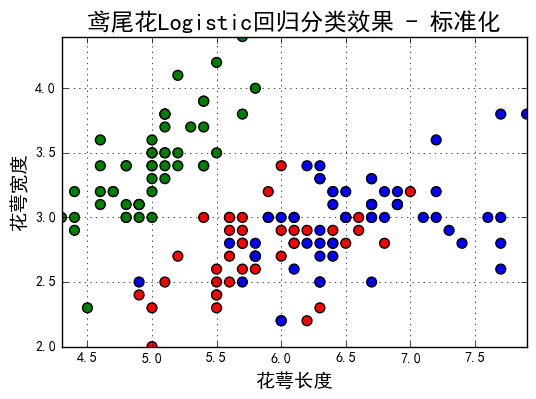

In [78]:
# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.title(u'鸢尾花Logistic回归分类效果 - 标准化', fontsize=17)
plt.show()

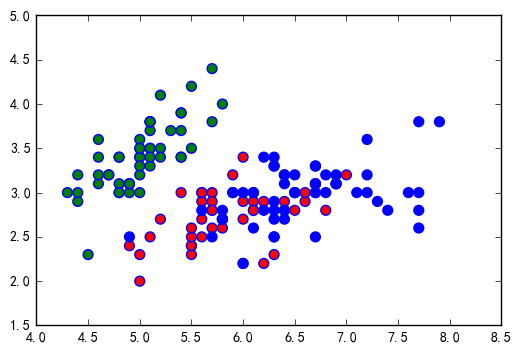

In [87]:
plt.scatter(x[:, 0], x[:, 1],c=y,cmap=mpl.colors.ListedColormap(['g', 'r', 'b']),s=50,edgecolors='b')
plt.show()

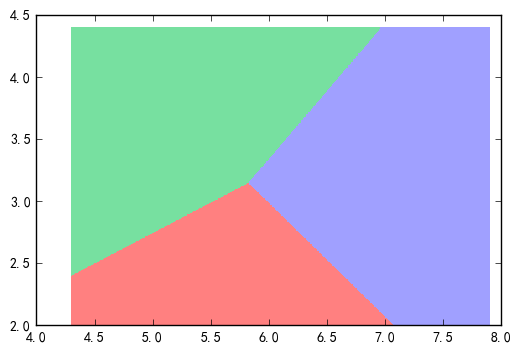

In [89]:
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.show()